In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input
import numpy as np
import pandas as pd

In [ ]:
np.random.seed(42)
size = np.random.randint(800,4000,1000)
bedrooms = np.random.randint(1,6,1000)
location = np.random.randint(1,4,1000)

price = (size*150)+(bedrooms*10000)+(location*20000)+np.random.randint(10000,50000,1000)
df=pd.DataFrame({'size':size,'bedrooms':bedrooms,'location':location,'price':price})
df.head()

,size,bedrooms,location,price
0,3974,1,2,667631
1,1660,5,2,363721
2,2094,4,1,403306
3,1930,2,2,397211
4,1895,1,1,330780


In [ ]:
#Data Prep and splitting
X = df.drop('price', axis=1)
y = df['price']

#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

target_scaler = StandardScaler()

y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1,1))

# forward propogation : we pass the data through all the neuron we get the predicted output

In [ ]:
#create a sequential model
model = Sequential([
    Input(shape=(3,)), #input layer with 3 features
    Dense(10, activation='relu'), #hidden layer with 10 neurons
    Dense(5, activation='relu'), #hidden layer with 5 neurons
    Dense(1) #output layer
])

# more complex the tasks we need more neurons , if we have too many neurons it can lead to overfitting issue and in less it can lead to underfitting

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mse',metrics = ['mae']) #learning rate = 0.001

#optimizer  = Adam(learning_rate = 0.1), SGD, Rmsprop

In [ ]:
#training the model
history = model.fit(X_train_scaled, y_train_scaled, validation_data = (X_test_scaled,y_test_scaled),epochs=100, batch_size=32)
#

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.9761 - mae: 0.8124 - val_loss: 0.6789 - val_mae: 0.6816
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8054 - mae: 0.7476 - val_loss: 0.5406 - val_mae: 0.6078
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6786 - mae: 0.6830 - val_loss: 0.4379 - val_mae: 0.5402
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6266 - mae: 0.6472 - val_loss: 0.3595 - val_mae: 0.4703
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5062 - mae: 0.5550 - val_loss: 0.3094 - val_mae: 0.4152
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.4283 - mae: 0.4921 - val_loss: 0.2757 - val_mae: 0.3750
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.4112 - mae: 0.4620 - val_loss: 0.2507 - val_mae: 0.3453
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3681 - mae: 0.4253 - val_loss: 0.2320 - val_mae: 0.3224
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss

In [ ]:
#evaluate model performance on test data
test_loss, test_mae = model.evaluate(X_test_scaled,y_test_scaled)
print(f'Test Loss (MSE): {test_loss}')
print(f'Test MAE: {test_mae}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0073 - mae: 0.0722
Test Loss (MSE): 0.006658956874161959
Test MAE: 0.06804715096950531


In [ ]:
#making predictions on new data
new_house = np.array([[2000,3,2],[3000,4,1]])
new_house_scaled = scaler.transform(new_house) # scale the new data

#predicting the ohuse prices
new_house_predictions = model.predict(new_house_scaled)  # scaled predictions

#inverse scaling to get original price
house_predictions_original = target_scaler.inverse_transform(new_house_predictions)
print(house_predictions_original)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[395511.47]
 [535870.4 ]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


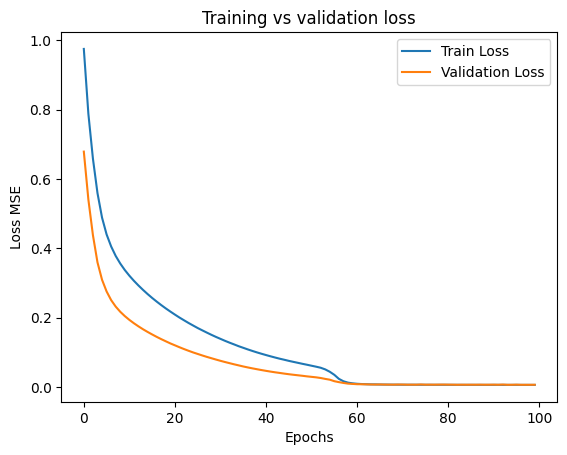

In [ ]:
import matplotlib.pyplot as plt

#plot training and validation loss
plt.plot(history.history['loss'],label = 'Train Loss')
plt.plot(history.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss MSE')
plt.legend()
plt.title('Training vs validation loss')
plt.show()

In [ ]:
#early stopping  will watch for some metric will check if certain period of time if that metric is not changing then what is the point , why waste computational power

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

history = model.fit(X_train_scaled, y_train_scaled,
                    validation_data = (X_test_scaled,y_test_scaled),
                    epochs = 200, batch_size = 32,callbacks = [early_stopping])

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0063 - mae: 0.0676 - val_loss: 0.0065 - val_mae: 0.0673
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0065 - mae: 0.0681 - val_loss: 0.0067 - val_mae: 0.0681
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mae: 0.0639 - val_loss: 0.0066 - val_mae: 0.0681
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mae: 0.0644 - val_loss: 0.0065 - val_mae: 0.0675
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mae: 0.0651 - val_loss: 0.0066 - val_mae: 0.0677
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - mae: 0.0654 - val_loss: 0.0067 - val_mae: 0.0684
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0061 - mae: 0.0659 - val_loss: 0.0068 - val_mae: 0.0694
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mae: 0.0636 - val_loss: 0.0068 - val_mae: 0.0689
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0

Forward and Backward Propagation

    Forward Propagation: Compute predictions using weights & activation functions

    Loss Function: Calculate the error between predictions & actual values.

    Backward Propagation: Adjust weights and biases to reduce the erron

In [ ]:
#Pytorch implementation
#house data - sample dataset

np.random.seed (42)
size = np.random.randint(800, 4000, 1000) #house size in sq.ft
bedrooms = np.random.randint(1, 6, 1000) # Number of bedrooms
location = np.random.randint(1, 4, 1000)


#price
price = (size * 150) + (bedrooms * 10000) + (location * 20000) + np.random.randint (10000, 50000, 1000)

#create a DF
df = pd.DataFrame({'Size' : size, 'Bedrooms': bedrooms, 'Location': location, 'Price': price})

#Data Prep and splitting
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
import torch

#convert features to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

#Convert target to tensor and reshape to (n_samples, 1)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).view(-1, 1)

y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32).view(-1, 1)

In [ ]:
#Define the nueral network import torch.nn as nn

import torch.nn as nn

class HousePriceModel(nn.Module):
  def __init__(self):
    super(HousePriceModel, self).__init__()
    self.fc1 = nn.Linear(in_features=3, out_features=10)
    self.fc2 = nn.Linear(in_features=10, out_features=5)
    self.fc3 = nn.Linear(in_features=5, out_features=1)

def forward(self, x):
  x = torch.relu(self.fc1(x))
  x = torch.relu(self.fc2(x))
  x = self.fc3(x)
  return x

#initialize the model
model = HousePriceModel()

In [ ]:
#define the Loss function and optimizer
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [ ]:
#train the model

epochs = 100

for epoch in range(epochs):
  model.train()

  #Forward pass
  y_pred = model(X_train_tensor)
  #Compute Loss
  loss = criterion(y_pred, y_train_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

if (epoch+1) % 10 == 0:
  print(f'Epoch[{epoch+1}/{epochs}],Loss:{loss.items():.4f}')

NotImplementedError: Module [HousePriceModel] is missing the required "forward" function

In [ ]:
#evaluate the model

model.eval()

with torch.no_grad():

y_pred_test = model(X_test_tensor)

test_loss = criterion(y_pred_test, y_test_tensor)

print(f'Test Loss MSE: {test_loss.item(): .4f}')

IndentationError: expected an indented block after 'with' statement on line 5 (ipython-input-656920474.py, line 7)

In [ ]:
make predicitons

with torch.no_grad():

predictions = model(X_test_tensor[:10]) predictions_org = target_scaler.inverse_transform(predictions.numpy()) print('predictions:',predictions_org)

SyntaxError: invalid syntax (ipython-input-674172486.py, line 1)

Activation Functions in Neural Networks

- Sigmoid is useful for binary classification but suffers from vanishing gradients for large/small inputs.

- Softmax is used in the output layer for multi-class classification problems. (here only one output) (in multilable there can be multiple outputs)

- ReLU is used as the default activation function for hidden layers for deep networks.

- Tanh is useful when you need outputs centered around 0. (standardization)

- Leaky ReLU is used as an alternative to ReLU to mitigate the dying ReLU problem. (dying relu problem sometime some neurons dies as values are becoming inactive , leaky relu keeps the neuron active and reduces the chances of neuron dying as it will allow small -ve value less than zero)

Activation functions affect how the network learns, so choosing the right one is important!-

Overfitting and Regularization

Techniques to Prevent Overfitting

1. Dropout   -
2. Regularization - L1(Lasso) and L2(Ridge)

        model = Sequential([

           Dense(128, input_shape=(784,), activation='relu', kernel_regularizer=regularizers.11(0.01) # apply L1

3. Data Augmentation
4. Early stopping